In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

In [ ]:
import sys  
sys.path.insert(0, '/home/etd/Desktop/Bank-Marketing-Campaign-Subscriptions')
import data_cleaning as dc

In [ ]:
df=pd.read_csv('Bank_Campaign.csv', sep=';')

# PREPROCESSING

In [ ]:
df=dc.replaceWNAN(df,['unknown','nonexistent'])

In [ ]:
df.isna().sum()

In [ ]:
df.shape

In [ ]:
df['subscribed'].value_counts().plot(kind='bar')
YES, NON = df['subscribed'].value_counts()
print('Number of yes ',YES/(YES+NON)*100,'%')
print('Number of no : ',NON/(NON+YES)*100,'%')

In [ ]:
#delete rows from a feature with at most 1731
df.drop(df[df['job'].isna()].index, inplace = True)
df.drop(df[df['marital'].isna()].index, inplace = True)
df.drop(df[df['education'].isna()].index, inplace = True)
df.drop(df[df['housing'].isna()].index, inplace = True)
df.drop(df[df['loan'].isna()].index, inplace = True)
df.drop('poutcome',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('day_of_week',axis=1,inplace=True)

In [ ]:
df=df.replace('yes',1)
df=df.replace('no',0)
df=df.replace('cellular',1)
df=df.replace('telephone',0)
#df=df.replace('success',1)
#df=df.replace('failure',0)
#extract categorical and numerical features
cat_col,num_col=dc.extract_features_type(df)

In [ ]:
#categorical features encoding
## Nominal data -- onehot
## Ordinal data -- labelencoder

In [ ]:
# one hot encoding categorical variables
cat_col.remove('education')
df=dc.one_hot_encoding(df,cat_col)

In [ ]:
from sklearn.preprocessing import LabelEncoder
education_level={'illiterate':0,'basic.4y':1, 'basic.6y':2,'basic.9y':3, 'high.school':4,'professional.course':5, 'university.degree':6}
df.education.replace(education_level,inplace=True)

In [ ]:
df=dc.knn_imput(df,5)

In [ ]:
# handling outliers

In [ ]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

In [ ]:
plot(df,'age') 

In [ ]:
df.drop(df[df['age'] > 90].index, inplace = True)
df.drop(df[df['duration']>3000].index, inplace = True)
df.drop(df[df['campaign']>20].index, inplace = True)
df.drop(df[df['previous']>6].index, inplace = True)

In [ ]:
df.to_csv (r'clean_DS.csv', index = False, header=True)

# DATA NORMALISATION

In [1]:
import sys  
sys.path.insert(0, '/home/etd/Desktop/Bank-Marketing-Campaign-Subscriptions')
import data_cleaning as dc

sys.path.insert(0, '/home/etd/Desktop/Bank-Marketing-Campaign-Subscriptions')
import data_reduction as dr

sys.path.insert(0, '/home/etd/Desktop/Bank-Marketing-Campaign-Subscriptions')
import data_classification as dc

import pandas as pd
df=pd.read_csv('clean_DS.csv')

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# FEATURE SELECTION

In [3]:
#create X matrix and y vector
y = df['subscribed']
df.drop('subscribed',axis=1,inplace=True)
X=df

In [4]:
anova_subset=dr.ANOVA(df,X,y)

In [5]:
rf_subset=dr.RF(X,y)

In [6]:
mi_subset=dr.MI(X,y,27)

In [7]:
anova_subset

['duration',
 'nr.employed',
 'pdays',
 'euribor3m',
 'emp.var.rate',
 'previous',
 'contact',
 'cons.price.idx',
 'student',
 'retired',
 'blue-collar',
 'education',
 'single',
 'campaign',
 'married',
 'cons.conf.idx',
 'services',
 'loan',
 'housemaid',
 'housing',
 'entrepreneur',
 'management',
 'age',
 'technician',
 'default',
 'unemployed',
 'self-employed']

In [8]:
rf_subset

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [9]:
mi_subset

Index(['duration', 'euribor3m', 'cons.conf.idx', 'cons.price.idx',
       'nr.employed', 'emp.var.rate', 'pdays', 'previous', 'contact', 'age',
       'student', 'married', 'campaign', 'housemaid', 'blue-collar',
       'education', 'default', 'housing', 'retired', 'technician', 'services',
       'self-employed', 'single', 'entrepreneur', 'unemployed', 'loan',
       'management'],
      dtype='object')

In [10]:
def inter(a,b,c):
    return list(set(a) & (set(b) | set(c)))

In [11]:
#intersection de tous les subsets
inters=inter(anova_subset[:14],rf_subset,mi_subset[:14])

# DATA BALANCING

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
y = y.to_frame()
x_smote, y_smote = smote.fit_resample(df[inters], y)
x_smote = pd.DataFrame(x_smote,columns=df[inters].columns)
y_smote = pd.DataFrame(y_smote,columns=y.columns)
data_SMOTE = pd.concat([x_smote, y_smote], axis=1)

Number of yes  50.0 %
Number of no :  50.0 %


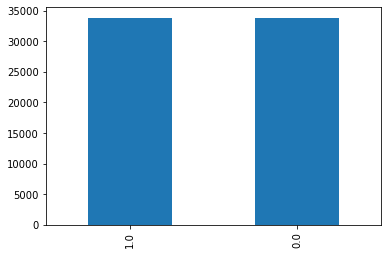

In [13]:
data_SMOTE['subscribed'].value_counts().plot(kind='bar')
YES, NON = data_SMOTE['subscribed'].value_counts()
print('Number of yes ',YES/(YES+NON)*100,'%')
print('Number of no : ',NON/(NON+YES)*100,'%')

# CLASSIFICATION

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x_smote,y_smote,train_size=0.75, random_state=0) 

In [19]:
knn=dc.knn(X_train,y_train,5)

/home/etd/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
score=knn.score(X_test,y_test)

print(score)

0.9107786909477916


In [ ]:
models = []
models.append(('MLP', MLPClassifier(solver='adam',hidden_layer_sizes=(8,7,7),activation='relu',batch_size=32, max_iter=300)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('decision tree', DecisionTreeClassifier()))
models.append(('logistic',LogisticRegression(C=10e10)))